# Minimize Cost

In [1]:
import tensorflow as tf

### Data set and Making hypothesis

In [2]:
# data set
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

# try to find values for w and b that compute y_data = W * x_data + b
# range is -100 ~ 100
W = tf.Variable(tf.random_uniform([1], -10000., 10000.))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# my hypothesis
hypothesis = W * X

### Simplified cost function & minimize

$W = W - \alpha {1 \over m} \sum_{i=1}^m(W_x^{(i)}-y^{(i)})x^{(i)}$

In [3]:
# Simplified cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# minimize
descent = W - tf.mul(0.1, tf.reduce_mean(tf.mul( ( tf.mul(W, X) - Y ), X ), )) #GDS 알고리즘
update = W.assign(descent)

### initialize & Launch session

In [4]:
# before starting, initialize the variables
init = tf.initialize_all_variables()

# launch
sess = tf.Session()
sess.run(init)

# fit the line
for step in range(20):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 713386.0 [-306.74560547]
1 44586.8 [-75.43640137]
2 2786.83 [-17.60910034]
3 174.333 [-3.15227509]
4 11.0521 [ 0.46193123]
5 0.847005 [ 1.36548281]
6 0.209188 [ 1.5913707]
7 0.169324 [ 1.64784265]
8 0.166833 [ 1.6619606]
9 0.166677 [ 1.66549015]
10 0.166667 [ 1.66637254]
11 0.166667 [ 1.66659307]
12 0.166667 [ 1.66664827]
13 0.166667 [ 1.6666621]
14 0.166667 [ 1.66666555]
15 0.166667 [ 1.66666639]
16 0.166667 [ 1.66666663]
17 0.166667 [ 1.66666663]
18 0.166667 [ 1.66666663]
19 0.166667 [ 1.66666663]


In [5]:
print(sess.run(hypothesis, feed_dict={X: 5}))
print(sess.run(hypothesis, feed_dict={X: 2.5}))

[ 8.33333302]
[ 4.16666651]


## Cost function 시각화 


In [8]:
X = [1., 2., 3.]
Y = [1., 2., 3.]
m = n_samples = len(x_data)

#  초기 변수값 설정
W = tf.placeholder(tf.float32)

# 가설
hypothesis = tf.mul(X, W)

# Cost function
cost = tf.reduce_sum(tf.pow(hypothesis - Y, 2)) / (m)

# 모든 변수 초기화
init = tf.initialize_all_variables()

# For graphs
W_val = []
cost_val = []

In [10]:
sess = tf.Session()
sess.run(init)
for i in range(-30, 50):
    print(i*0.1, sess.run(cost, feed_dict={W : i*0.1}))
    W_val.append(i*0.1)
    cost_val.append(sess.run(cost, feed_dict={W: i*0.1}))

-3.0 56.0
-2.9000000000000004 53.235
-2.8000000000000003 50.54
-2.7 47.915
-2.6 45.36
-2.5 42.875
-2.4000000000000004 40.46
-2.3000000000000003 38.115
-2.2 35.84
-2.1 33.635
-2.0 31.5
-1.9000000000000001 29.435
-1.8 27.44
-1.7000000000000002 25.515
-1.6 23.66
-1.5 21.875
-1.4000000000000001 20.16
-1.3 18.515
-1.2000000000000002 16.94
-1.1 15.435
-1.0 14.0
-0.9 12.635
-0.8 11.34
-0.7000000000000001 10.115
-0.6000000000000001 8.96
-0.5 7.875
-0.4 6.86
-0.30000000000000004 5.915
-0.2 5.04
-0.1 4.235
0.0 3.5
0.1 2.835
0.2 2.24
0.30000000000000004 1.715
0.4 1.26
0.5 0.875
0.6000000000000001 0.56
0.7000000000000001 0.315
0.8 0.14
0.9 0.035
1.0 0.0
1.1 0.035
1.2000000000000002 0.14
1.3 0.315
1.4000000000000001 0.56
1.5 0.875
1.6 1.26
1.7000000000000002 1.715
1.8 2.24
1.9000000000000001 2.835
2.0 3.5
2.1 4.235
2.2 5.04
2.3000000000000003 5.915
2.4000000000000004 6.86
2.5 7.875
2.6 8.96
2.7 10.115
2.8000000000000003 11.34
2.9000000000000004 12.635
3.0 14.0
3.1 15.435
3.2 16.94
3.300000000000000

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

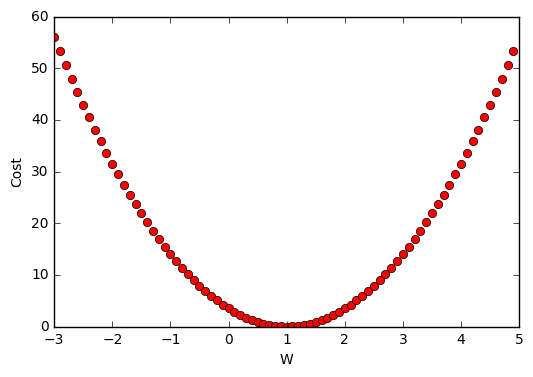

In [13]:
plt.plot(W_val,cost_val,'ro')
plt.ylabel("Cost")
plt.xlabel("W")